In [226]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [227]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.6.0.66
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv_python_headless-4.5.4.60-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.6 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv_python_headless-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (48.3 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.6.2 requires opencv-python-headless<=4.5.4.60, but you have opencv-python-headless 4.6.0.66 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [228]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

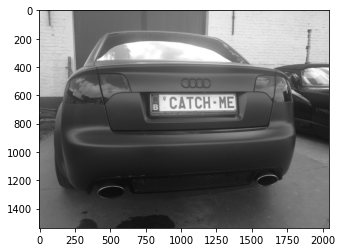

In [229]:
img = cv2.imread('/content/catchme_1_0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

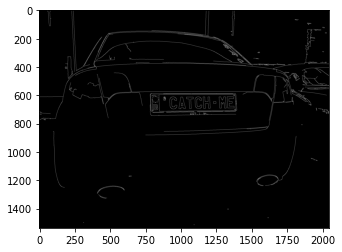

In [230]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #noise reduction in image
edged = cv2.Canny(bfilter, 30, 200) # Edge  detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [231]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [232]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [233]:
location

array([[[ 847,  597]],

       [[1381,  595]],

       [[1390,  703]],

       [[ 852,  713]]], dtype=int32)

In [234]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0 ,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

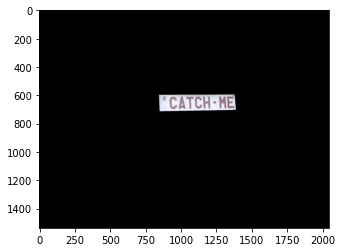

In [235]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [236]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

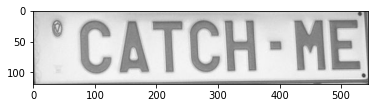

In [237]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [238]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[65, 1], [544, 1], [544, 113], [65, 113]],
  'CAtCH- MEI',
  0.23087956991971645)]

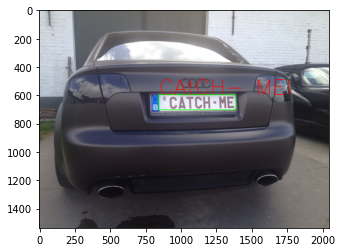

In [240]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]), fontFace=font, fontScale=5, color=(0,0,255), thickness=3, lineType=0, bottomLeftOrigin=0)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
